In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
import h5py
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import sys
import tensorflow as tf

sys.path.append('..')
import VeryAccurateEmulator as VAE
from training_tools import em_loss_fcn

## Table 1

In [56]:
best = VAE.VeryAccurateEmulator()

In [59]:
lb = best.compute_rms_error(relative=False, flow=50, fhigh=100)
mb = best.compute_rms_error(relative=False, flow=60, fhigh=120)
hb = best.compute_rms_error(relative=False, flow=90, fhigh=200)
wb = best.compute_rms_error(relative=False, flow=50, fhigh=200)
fb = best.compute_rms_error(relative=False)

for b in [fb, lb, mb, hb, wb]:
    print(b.mean())
    print(np.median(b))
    print('\n---------\n')

0.5371503
0.49903005

---------

0.49636072
0.4523543

---------

0.566506
0.51802754

---------

0.9045284
0.78751755

---------

0.70789945
0.6475112

---------



## Figure 3

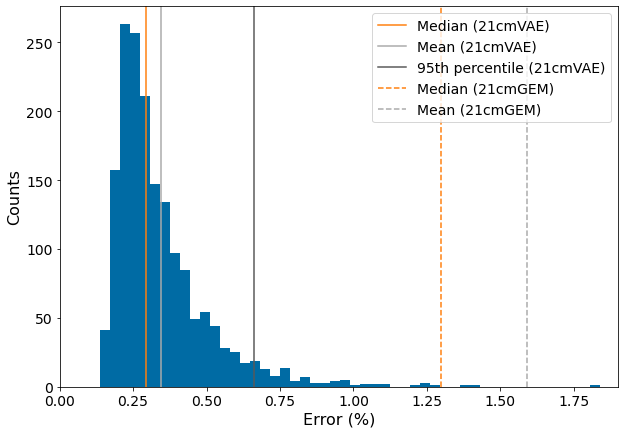

In [68]:
style.use('tableau-colorblind10')
error = best.compute_rms_error()
plt.figure(figsize=(10,7))
plt.hist(100*error, bins=50, color='C0')
plt.axvline(100*np.median(error), label='Median (21cmVAE)', ls='-', color='C1')
plt.axvline(100*np.mean(error), label='Mean (21cmVAE)', ls='-', color='C2')
plt.axvline(100*np.percentile(error, 95), label='95th percentile (21cmVAE)', ls='-', color='C3')
plt.axvline(100*0.0130, label='Median (21cmGEM)', ls='--', c='C1')
plt.axvline(100*0.0159, label='Mean (21cmGEM)', ls='--', color='C2')
plt.xlabel("Error (%)", fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0., 1.9)
#plt.savefig('hist.eps')
plt.show()

## Figure 4

In [70]:
signal_test = best.signal_test
predicted_signal = best.predict(best.par_test)

In [71]:
def get_params_txt(percentile, mean=False, largest=False):
    if percentile > 0:
        p = par_test[error == np.percentile(error, percentile, interpolation='nearest')][0]
    elif mean == True:
        p = par_test[np.argmin(np.abs(error - np.mean(error)))]
    else:
        p = par_test[np.argmax(error)]
  
    s = 'Parameters:\n'
    for i, l in enumerate(par_labels):
        if i == 1:
            line = l + ' = {:.4f} km'.format(p[i])
            line += r'$s^{-1}$'
            line += '\n'
        elif i <=2:
            line = l + ' = {:.4f} \n'.format(p[i])
        elif i == 5:
            line = l + ' = {:.2f} keV\n'.format(p[i])
        elif i == 6:
            line = l + ' = {:.2f} Mpc\n'.format(p[i])    
        else:
            line = l + ' = {:.2f} \n'.format(p[i])
    s += line
    return s

In [ ]:
style.use('tableau-colorblind10')
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)
axs[0, 0].plot(nu, signal_test[error == np.percentile(error, 10, interpolation='nearest')][0], label='True signal', color='C0')
axs[0, 0].plot(nu, predicted_signal[error == np.percentile(error, 10, interpolation='nearest')][0], label='Predicted signal', ls='--', color='C1')
axs[0, 0].set_title("10th percentile error = {:.2f}%".format(100*np.percentile(error, 10, interpolation='nearest')), fontsize=16)
#axs[0, 0].text(230, -200, 'a)', fontsize=14)
axs[0, 0].text(170, -200, get_params_txt(10), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})

# axs[1, 1].plot(nu, signal_test[error == np.percentile(error, 90, interpolation='nearest')][0], label='True signal')
# axs[1, 1].plot(nu, predicted_signal[error == np.percentile(error, 90, interpolation='nearest')][0], label='Predicted signal', ls='--')
axs[1, 0].set_title("95th percentile error = {:.2f}%".format(100*np.percentile(error, 95, interpolation='nearest')), fontsize=16)
axs[1, 0].plot(nu, signal_test[error == np.percentile(error, 95, interpolation='nearest')][0], label='True signal', color='C0')
axs[1, 0].plot(nu, predicted_signal[error == np.percentile(error, 95, interpolation='nearest')][0], label='Predicted signal', ls='--', color='C1')
#axs[1, 0].text(230, -200, 'c)', fontsize=14)
axs[1, 0].text(170, -200, get_params_txt(95), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})
axs[1, 1].plot(nu, signal_test[np.argmax(error)], label='True signal', color='C0')
axs[1, 1].plot(nu, predicted_signal[np.argmax(error)], label='Predicted signal', ls='--', color='C1')
#axs[1, 1].text(230, -200, 'd)', fontsize=14)
axs[1, 1].text(170, -200, get_params_txt(0, largest=True), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})
axs[1, 1].set_title("Largest error = {:.2f}%".format(100*np.max(error)), fontsize=16)
# axs[1, 0].plot(nu, signal_test[np.argmin(np.abs(error - np.mean(error)))], label='True signal')
# axs[1, 0].plot(nu, predicted_signal[np.argmin(np.abs(error - np.mean(error)))], label='Predicted signal', ls='--')
axs[0, 1].plot(nu, signal_test[error == np.percentile(error, 50, interpolation='nearest')][0], label='True signal', color='C0')
axs[0, 1].plot(nu, predicted_signal[error == np.percentile(error, 50, interpolation='nearest')][0], label='Predicted signal', ls='--', color='C1')
#axs[0, 1].text(230, -200, 'b)', fontsize=14)
axs[0, 1].text(170, -200, get_params_txt(50), bbox=dict(facecolor='white', alpha=.5), fontdict={'size'   : 14})
axs[0, 1].set_title("Median error = {:.2f}%".format(100*np.percentile(error, 50, interpolation='nearest')), fontsize=16)

for ax in axs.flat:
    ax.set_xlabel(r'$\nu$ [MHz]', fontsize=16)
    ax.set_ylabel('T [mK]', fontsize=16)
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(14)
axs[1, 0].legend(loc='best', fontsize=14)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.savefig('comparison.eps')

plt.show()

## Figure 6

In [29]:
em_dist = np.load('nov8_manyems.npy') * 100
ae_em_dist = np.load('nov8_manyaeems.npy') * 100

mean_em = np.mean(em_dist, axis=1)
mean_ae_em = np.mean(ae_em_dist, axis=1)

median_em = np.median(em_dist, axis=1)
median_ae_em = np.median(ae_em_dist, axis=1)

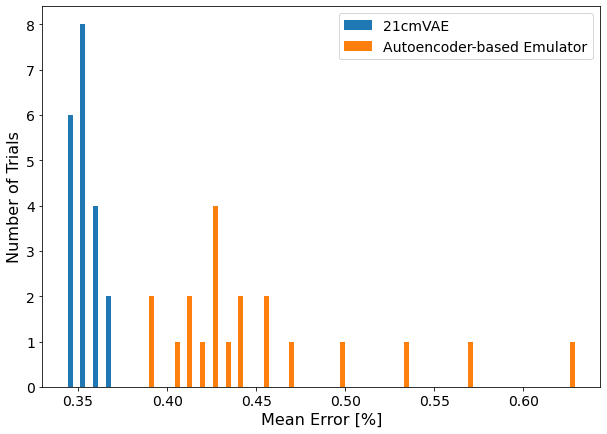

In [34]:
plt.figure(figsize=(10, 7))
plt.hist([mean_em, mean_ae_em], label=['21cmVAE', 'Autoencoder-based Emulator'], bins=40)
plt.legend(fontsize=14)
plt.xlabel('Mean Error [%]', fontsize=16)
plt.ylabel('Number of Trials', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('error_distribution.eps')
plt.show()

In [31]:
print(np.mean(mean_em))
print(np.std(mean_em)/np.sqrt(20))

print(np.mean(mean_ae_em))
print(np.std(mean_ae_em)/np.sqrt(20))

0.35411484360274315
0.0014842858661764477
0.45290856571432736
0.01333506094471459


In [32]:
print(np.mean(median_em))
print(np.std(median_em)/np.sqrt(20))

print(np.mean(median_ae_em))
print(np.std(median_ae_em)/np.sqrt(20))

0.30488991760648787
0.0014724734680355738
0.39924324373714626
0.011223751068959594


In [33]:
idx = mean_em.argmin()
print(mean_em[idx])
print(median_em[idx])

idx2 = mean_ae_em.argmin()
print(mean_ae_em[idx2])
print(median_ae_em[idx2])

0.3434216264501966
0.29414279852062464
0.3919982397887843
0.3513658884912729


## Figure 7

In [11]:
with h5py.File('../dataset_21cmVAE.h5', 'r') as hf:
    signal_train = hf['signal_train'][:]
total_train_set = np.shape(signal_train)[0]

In [26]:
loss = np.load('emulator_loss.npy')
N_runs, runs_per_frac = loss.shape[:2]
frac_values = np.arange(1, N_runs+1)/N_runs
test_loss = loss[:, :, -1] * 100  # in %
test_loss_avg = np.mean(test_loss, axis=1)
test_loss_std = np.std(test_loss, axis=1)
test_loss_err = test_loss_std/np.sqrt(runs_per_frac)

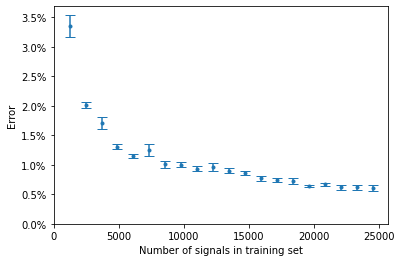

In [28]:
plt.figure()
plt.errorbar(frac_values*total_train_set, test_loss_avg, yerr=test_loss_err, fmt='.', capsize=5)
plt.xlabel('Number of signals in training set')
plt.ylabel('Error')
plt.ylim(0)
plt.xlim(0)
yt = np.arange(0, 4, 0.5)
plt.yticks(yt, [str(t) + '%' for t in yt])
plt.show()